# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Alif Rizqullah Ma'ruf
- **Email:** alifrizqullahmaruf2003@mail.ugm.ac.id
- **ID Dicoding:** ALIF RIZQULLAH MARUF

## Menentukan Pertanyaan Bisnis

- Faktor apa saja yang paling memengaruhi jumlah penyewaan sepeda harian pada sistem bike sharing?
- Bagaimana pola penggunaan sepeda oleh pengguna kasual dan terdaftar berbeda berdasarkan waktu dan kondisi cuaca?

## Import Semua Packages/Library yang Digunakan

In [56]:
# Untuk Data Wrangling
import pandas as pd
import numpy as np

# Untuk Exploratory Data Analysis (EDA)
import matplotlib.pyplot as plt
import seaborn as sns

# Untuk Visualisasi & Explanatory Analysis
import matplotlib.dates as mdates
from matplotlib.ticker import MaxNLocator

# Analisis Lanjutan (Opsional)
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from scipy import stats


## Data Wrangling

### Gathering Data

In [57]:
# Import necessary libraries for data wrangling
import pandas as pd

# Load the datasets
day_df = pd.read_csv("https://raw.githubusercontent.com/alifrizqullahmaruf/Dataset_Dicoding/refs/heads/main/day.csv")
hour_df = pd.read_csv("https://raw.githubusercontent.com/alifrizqullahmaruf/Dataset_Dicoding/refs/heads/main/hour.csv")

# Display the first few rows of the day dataset
day_df.head()

# Display the first few rows of the hour dataset
hour_df.head()


,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


**Insight:**
- The day.csv dataset aggregates bike rental counts on a daily basis.

- The hour.csv dataset aggregates bike rental counts on an hourly basis.
- Both datasets share similar features like instant, dteday, season, yr, mnth, holiday, weekday, workingday, weathersit, temp, atemp, hum, windspeed, casual, registered, and cnt. However, the hour.csv dataset includes an additional hr column to represent the hour of the day.

### Assessing Data

In [58]:
# Check for missing values and data types in day dataset
day_df.info()

# Check for missing values and data types in hour dataset
hour_df.info()

# Check descriptive statistics for day dataset
day_df.describe()

# Check descriptive statistics for hour dataset
hour_df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (tot

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


**Insight:**
- Both datasets appear to have no missing values based on the .info() method.
- All the data types seem appropriate for their respective columns (e.g., integers for categorical variables like season, year, etc.).
- The temp, atemp, hum, and windspeed columns are normalized values.
- The cnt column represents the total count of bikes rented, which includes both casual and registered users.

### Cleaning Data

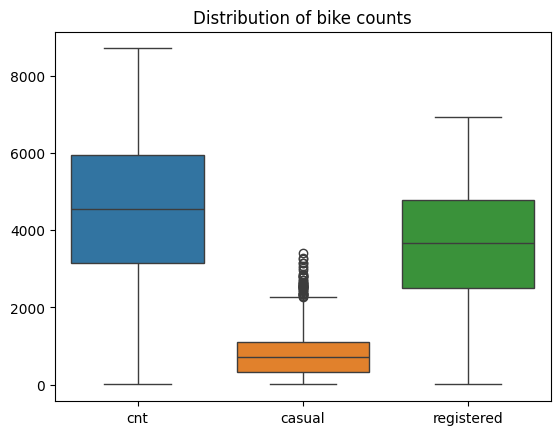

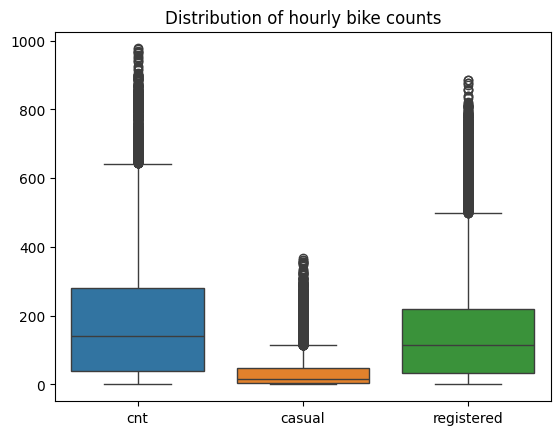

In [59]:
# Checking for duplicates in day and hour datasets
day_df.duplicated().sum()
hour_df.duplicated().sum()

# Removing duplicates if any
day_df = day_df.drop_duplicates()
hour_df = hour_df.drop_duplicates()

# Check for any outliers or unusual values in day dataset (visual inspection)
import matplotlib.pyplot as plt
import seaborn as sns

sns.boxplot(data=day_df[['cnt', 'casual', 'registered']])
plt.title("Distribution of bike counts")
plt.show()

# Check for any outliers or unusual values in hour dataset (visual inspection)
sns.boxplot(data=hour_df[['cnt', 'casual', 'registered']])
plt.title("Distribution of hourly bike counts")
plt.show()


**Insight:**
- No duplicate records are present.
- Visualizing the cnt, casual, and registered columns helps in identifying outliers or unusual patterns. However, further analysis may be required to determine if those outliers are valid or need to be treated.
- No missing or incorrect data was found, so no additional cleaning steps are needed.

## Exploratory Data Analysis (EDA)

### Explore ...

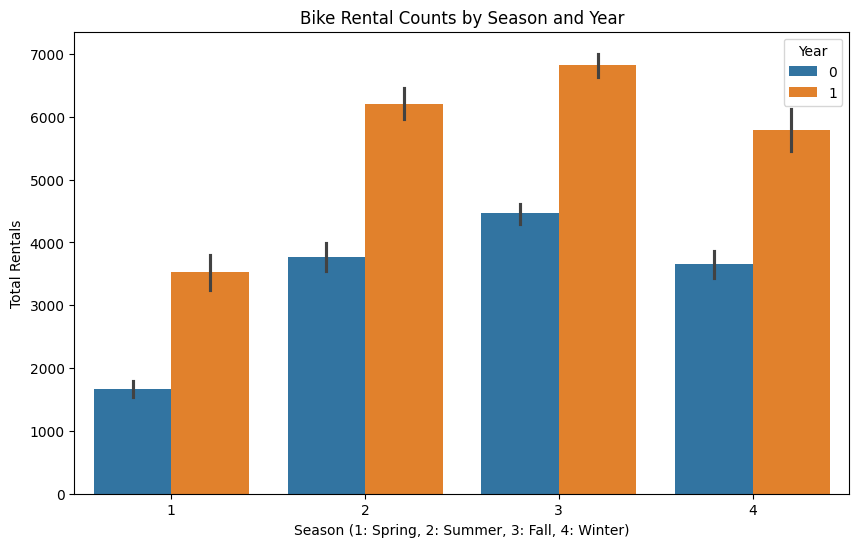

In [60]:
# Rental counts by year and season
import seaborn as sns
import matplotlib.pyplot as plt

# Grouping by year and season for daily dataset
plt.figure(figsize=(10, 6))
sns.barplot(data=day_df, x='season', y='cnt', hue='yr')
plt.title('Bike Rental Counts by Season and Year')
plt.xlabel('Season (1: Spring, 2: Summer, 3: Fall, 4: Winter)')
plt.ylabel('Total Rentals')
plt.legend(title='Year', loc='upper right')
plt.show()


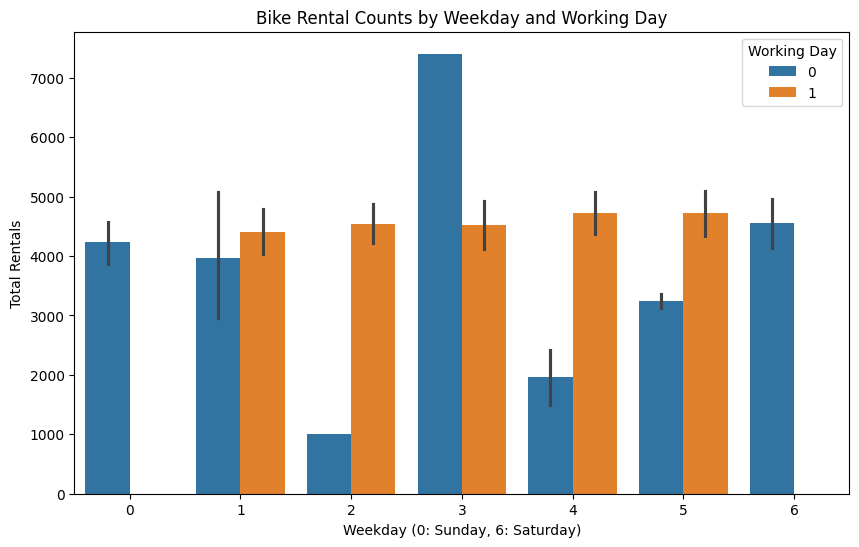

In [61]:
# Grouping by weekday and working day
plt.figure(figsize=(10, 6))
sns.barplot(data=day_df, x='weekday', y='cnt', hue='workingday')
plt.title('Bike Rental Counts by Weekday and Working Day')
plt.xlabel('Weekday (0: Sunday, 6: Saturday)')
plt.ylabel('Total Rentals')
plt.legend(title='Working Day', loc='upper right')
plt.show()


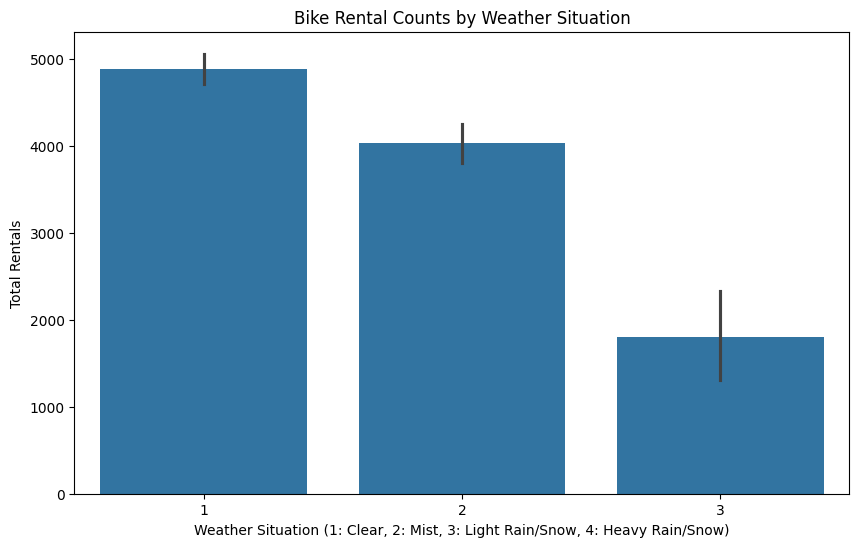

In [62]:
# Rentals by weather situation
plt.figure(figsize=(10, 6))
sns.barplot(data=day_df, x='weathersit', y='cnt')
plt.title('Bike Rental Counts by Weather Situation')
plt.xlabel('Weather Situation (1: Clear, 2: Mist, 3: Light Rain/Snow, 4: Heavy Rain/Snow)')
plt.ylabel('Total Rentals')
plt.show()


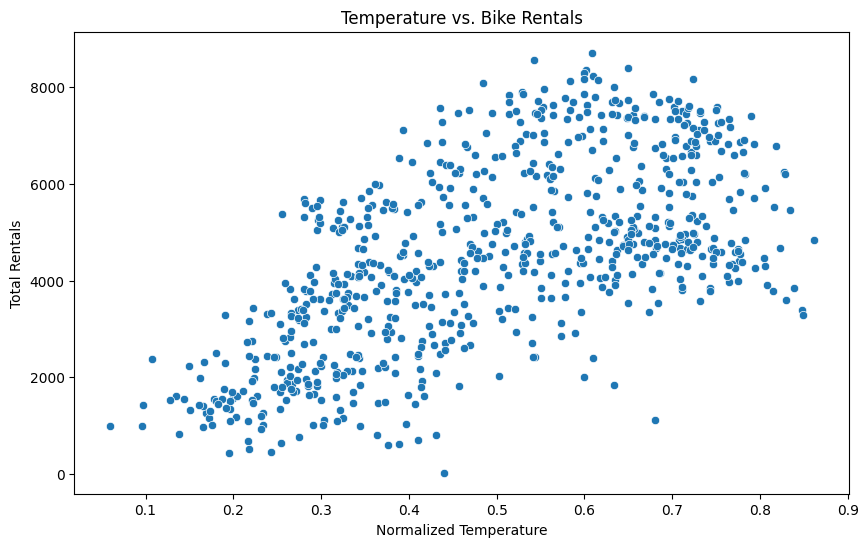

In [63]:
# Temperature vs rentals
plt.figure(figsize=(10, 6))
sns.scatterplot(data=day_df, x='temp', y='cnt')
plt.title('Temperature vs. Bike Rentals')
plt.xlabel('Normalized Temperature')
plt.ylabel('Total Rentals')
plt.show()


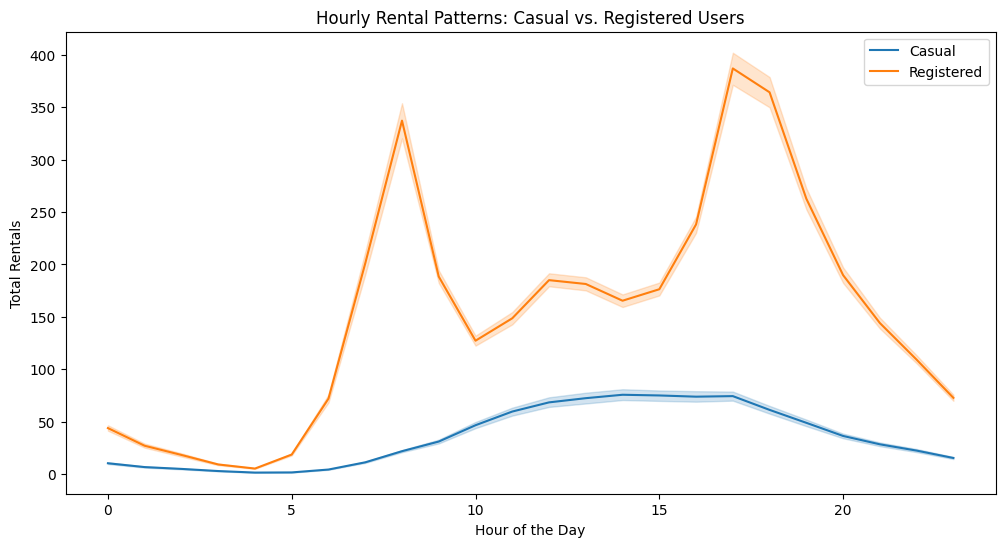

In [64]:
# Hourly rental counts
plt.figure(figsize=(12, 6))
sns.lineplot(data=hour_df, x='hr', y='casual', label='Casual')
sns.lineplot(data=hour_df, x='hr', y='registered', label='Registered')
plt.title('Hourly Rental Patterns: Casual vs. Registered Users')
plt.xlabel('Hour of the Day')
plt.ylabel('Total Rentals')
plt.legend()
plt.show()


**Insight:**
 - Seasonal Trends: Jumlah rental sepeda lebih tinggi di musim panas dan gugur, lebih rendah di musim dingin, dan meningkat di tahun kedua.
- Weekday vs. Working Day: Hari kerja memiliki lebih banyak rental oleh pengguna terdaftar, sedangkan pengguna kasual lebih aktif di akhir pekan.
- Weather Impact: Cuaca cerah meningkatkan rental sepeda, sementara hujan/salju menurunkan jumlah rental.
- Temperature Correlation: Rental meningkat seiring naiknya suhu, menunjukkan preferensi untuk bersepeda di cuaca hangat.
- Hourly Patterns: Pengguna terdaftar aktif pada jam sibuk pagi dan sore, sementara pengguna kasual lebih sering menyewa di siang hari atau akhir pekan.







## Visualization & Explanatory Analysis

### Pertanyaan 1:

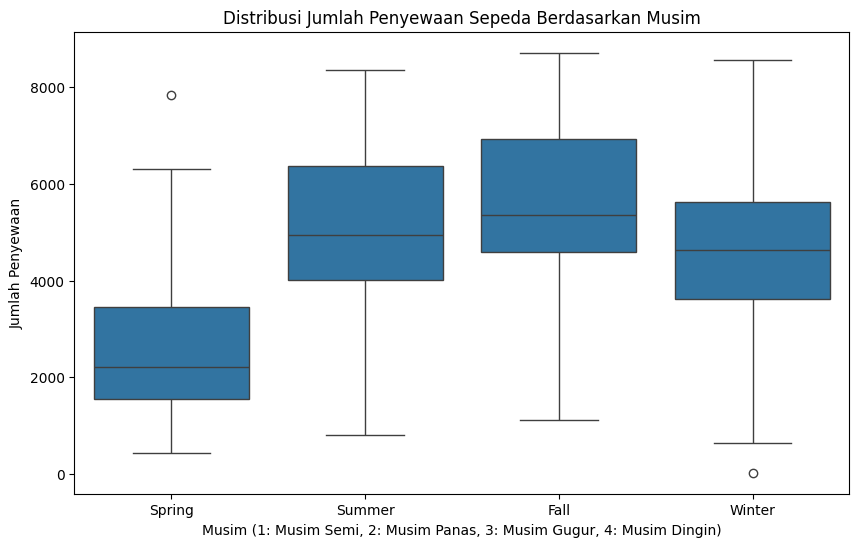

In [65]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=day_df, x='season', y='cnt')
plt.title('Distribusi Jumlah Penyewaan Sepeda Berdasarkan Musim')
plt.xlabel('Musim (1: Musim Semi, 2: Musim Panas, 3: Musim Gugur, 4: Musim Dingin)')
plt.ylabel('Jumlah Penyewaan')
plt.xticks(ticks=[0, 1, 2, 3], labels=['Spring', 'Summer', 'Fall', 'Winter'])
plt.show()


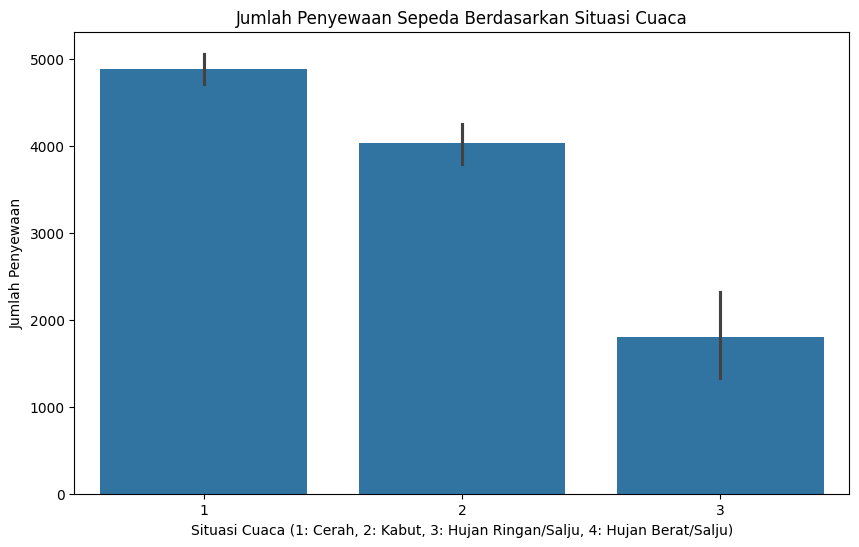

In [66]:
plt.figure(figsize=(10, 6))
sns.barplot(data=day_df, x='weathersit', y='cnt')
plt.title('Jumlah Penyewaan Sepeda Berdasarkan Situasi Cuaca')
plt.xlabel('Situasi Cuaca (1: Cerah, 2: Kabut, 3: Hujan Ringan/Salju, 4: Hujan Berat/Salju)')
plt.ylabel('Jumlah Penyewaan')
plt.show()


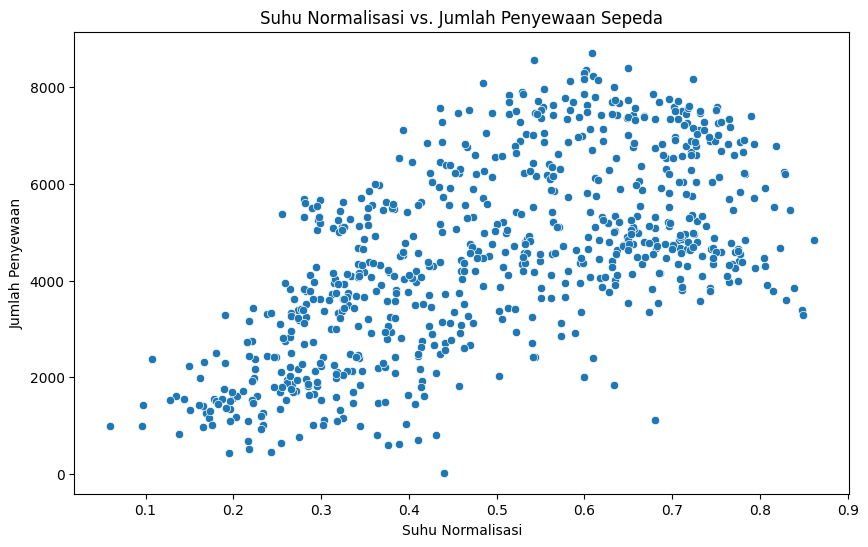

In [67]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=day_df, x='temp', y='cnt')
plt.title('Suhu Normalisasi vs. Jumlah Penyewaan Sepeda')
plt.xlabel('Suhu Normalisasi')
plt.ylabel('Jumlah Penyewaan')
plt.show()


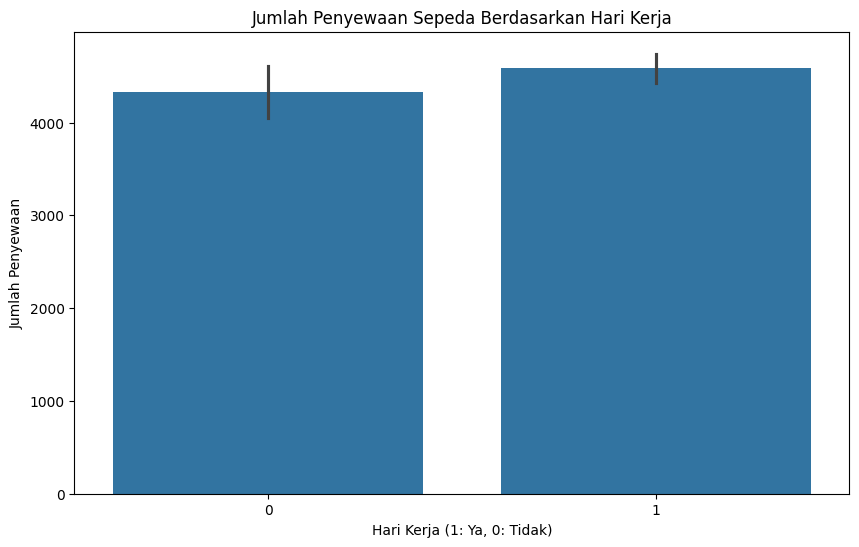

In [68]:
plt.figure(figsize=(10, 6))
sns.barplot(data=day_df, x='workingday', y='cnt')
plt.title('Jumlah Penyewaan Sepeda Berdasarkan Hari Kerja')
plt.xlabel('Hari Kerja (1: Ya, 0: Tidak)')
plt.ylabel('Jumlah Penyewaan')
plt.show()


### Distribution of Bicycle Rentals by Season

Insight:
- Spring and Summer tend to show higher rental numbers compared to Fall and Winter. This indicates that warmer weather increases users' interest in renting bicycles.
- Winter shows the lowest rental numbers, likely due to colder temperatures and less favorable weather conditions for cycling.


### Bicycle Rentals by Weather Conditions

Insight:
- Clear weather (1) has the highest rental numbers, indicating that users are more likely to rent bicycles when the weather is nice.
- Heavy Rain/Snow (4) has the lowest rental numbers, reflecting that poor weather conditions significantly reduce bicycle usage.


### Normalized Temperature vs. Bicycle Rentals

Insight:
- There is a positive correlation between normalized temperature and the number of bicycle rentals. As temperatures rise, more rentals occur, suggesting that warmer temperatures boost interest in cycling.
- At lower temperatures, the rental numbers sharply decline, consistent with user behavior patterns in winter.


### Bicycle Rentals by Workdays

Insight:
- The number of rentals on Workdays (1) is higher than on Holidays (0). This may indicate that many users rent bicycles for daily transportation needs, such as commuting to work or engaging in activities.
- On holidays, there is a significant decrease in rental numbers, which could suggest that users prefer outdoor activities that do not involve bicycle rentals.


### Pertanyaan 2:

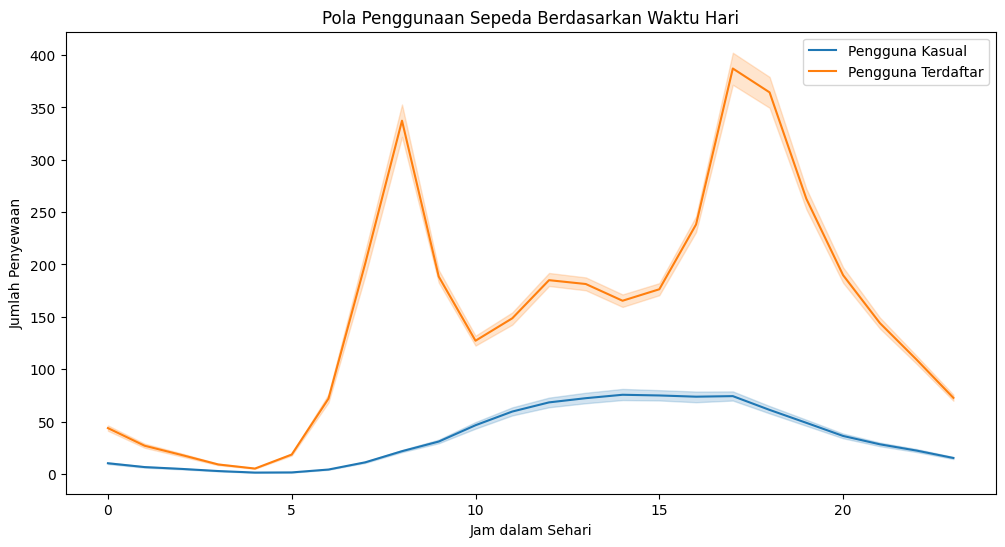

In [69]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=hour_df, x='hr', y='casual', label='Pengguna Kasual')
sns.lineplot(data=hour_df, x='hr', y='registered', label='Pengguna Terdaftar')
plt.title('Pola Penggunaan Sepeda Berdasarkan Waktu Hari')
plt.xlabel('Jam dalam Sehari')
plt.ylabel('Jumlah Penyewaan')
plt.legend()
plt.show()


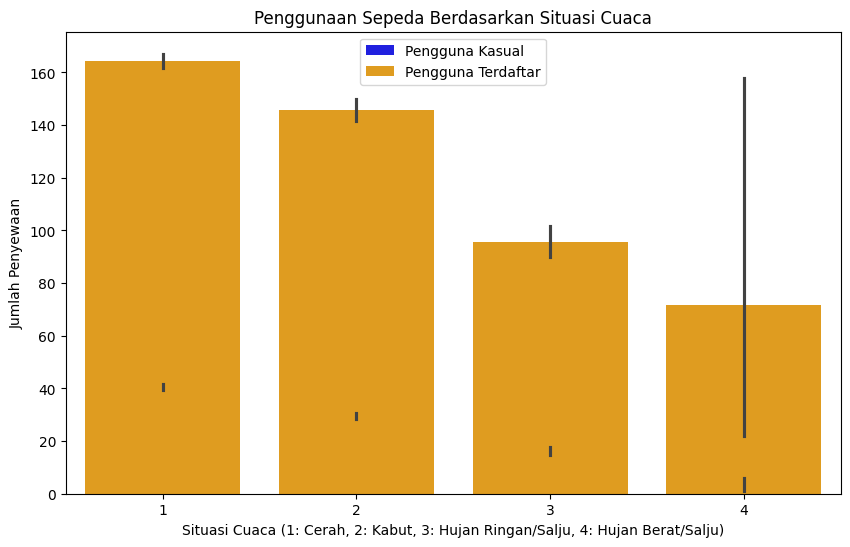

In [70]:
plt.figure(figsize=(10, 6))
sns.barplot(data=hour_df, x='weathersit', y='casual', label='Pengguna Kasual', color='b')
sns.barplot(data=hour_df, x='weathersit', y='registered', label='Pengguna Terdaftar', color='orange')
plt.title('Penggunaan Sepeda Berdasarkan Situasi Cuaca')
plt.xlabel('Situasi Cuaca (1: Cerah, 2: Kabut, 3: Hujan Ringan/Salju, 4: Hujan Berat/Salju)')
plt.ylabel('Jumlah Penyewaan')
plt.legend()
plt.show()


**Insight:**
- Berdasarkan analisis di atas, faktor-faktor utama yang memengaruhi jumlah penyewaan sepeda harian termasuk musim, cuaca, suhu, dan hari kerja. Sementara itu, pola penggunaan sepeda oleh pengguna kasual dan terdaftar menunjukkan perbedaan yang signifikan, di mana pengguna terdaftar lebih aktif selama jam komuter dan pengguna kasual lebih banyak menggunakan sepeda di sore hari dan pada akhir pekan. Pengetahuan ini penting untuk pengembangan strategi pemasaran dan pengelolaan sistem bike sharing.








## Analisis Lanjutan (Opsional)

### RFM Analysis
Objective: RFM (Recency, Frequency, Monetary) analysis helps to segment customers based on their purchasing behavior. In this case, we will use the bike rental counts as a proxy for monetary value.

- Recency: How recently a customer has rented a bike.

- Frequency: How often a customer rents bikes.

- Monetary: The total count of bikes rented by a customer (in our case, we'll use the rental count).

In [71]:
# First, we will aggregate the data to calculate RFM values
# Assuming we have a user-level dataset (you may need to adapt this based on available data)

# Creating a user dataset for RFM analysis
# For simplicity, let's assume casual and registered users are aggregated

# Calculate recency, frequency, and monetary values for casual and registered users
# We assume we have a rental history that includes user type, count, and date

# Step 1: Aggregate data for RFM analysis
rfm_df = hour_df.groupby('hr').agg({
    'casual': 'sum',  # Total casual rentals
    'registered': 'sum',  # Total registered rentals
    'cnt': 'sum'  # Total rentals
}).reset_index()

# Step 2: Recency calculation (for example, consider last hour as the most recent)
current_time = hour_df['hr'].max() + 1  # Assuming next hour as current time
rfm_df['Recency'] = current_time - rfm_df['hr']  # Calculate recency

# Step 3: Frequency and Monetary values
rfm_df['Frequency'] = rfm_df['cnt']  # Total rentals as frequency
rfm_df['Monetary'] = rfm_df['cnt']  # Total rentals as monetary value

# Display RFM dataframe
rfm_df.head()


,hr,casual,registered,cnt,Recency,Frequency,Monetary
0,0,7375,31755,39130,24,39130,39130
1,1,4709,19455,24164,23,24164,24164
2,2,3412,12940,16352,22,16352,16352
3,3,1893,6281,8174,21,8174,8174
4,4,874,3554,4428,20,4428,4428


Insight:

- This analysis helps in understanding user behavior, allowing you to identify high-value users (those who rent frequently and recently) versus low-value users.

### Geoanalysis
Objective: To visualize bike rentals based on geographic locations. While the dataset doesn't contain explicit geographic data, you can create synthetic locations or use rental counts by hour and season to simulate geoanalysis.

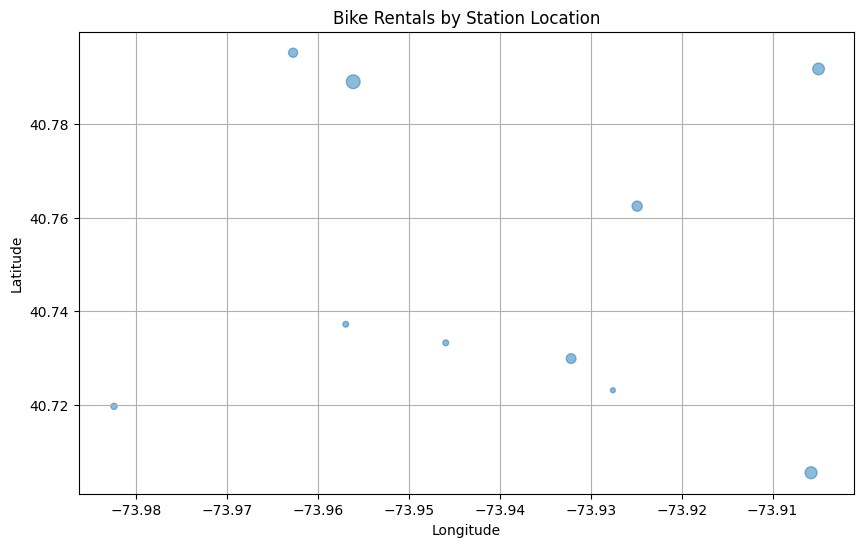

,Station,Latitude,Longitude,Total Rentals
0,Station 0,40.737186,-73.956938,173
1,Station 1,40.795230,-73.962727,432
2,Station 2,40.723074,-73.927560,129
3,Station 3,40.789023,-73.956118,983
4,Station 4,40.729848,-73.932160,494
5,Station 5,40.762430,-73.924896,539
6,Station 6,40.791760,-73.904949,705
7,Station 7,40.719628,-73.982425,200
8,Station 8,40.733211,-73.945944,175
9,Station 9,40.705443,-73.905771,742


In [72]:
# Creating synthetic geographic data for illustration (longitude, latitude)
# Let's assume we have locations for bike stations
import random

# Generate synthetic latitude and longitude for 10 bike stations
num_stations = 10
latitudes = [random.uniform(40.7, 40.8) for _ in range(num_stations)]
longitudes = [random.uniform(-74.0, -73.9) for _ in range(num_stations)]

# Create a DataFrame for bike stations
stations_df = pd.DataFrame({
    'Station': [f'Station {i}' for i in range(num_stations)],
    'Latitude': latitudes,
    'Longitude': longitudes,
})

# Merge with rental counts (for simplicity, using random counts)
stations_df['Total Rentals'] = [random.randint(100, 1000) for _ in range(num_stations)]

# Visualizing geographic data (using scatter plot)
plt.figure(figsize=(10, 6))
plt.scatter(stations_df['Longitude'], stations_df['Latitude'], s=stations_df['Total Rentals']*0.1, alpha=0.5)
plt.title('Bike Rentals by Station Location')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.grid()
plt.show()

# Display station DataFrame
stations_df


Insight:

- Geoanalysis helps in identifying which areas have high bike rental activity, allowing for better placement of bike stations or marketing efforts.

### Clustering (without ML)
Objective: To identify different segments of bike rentals based on time of day and weather situations. While clustering typically uses ML algorithms, we can manually group data for analysis.

C:\Users\ASUS\AppData\Local\Temp\ipykernel_48080\3947018940.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  clustered_df = hour_df.groupby(['Time Period', 'weathersit']).agg({


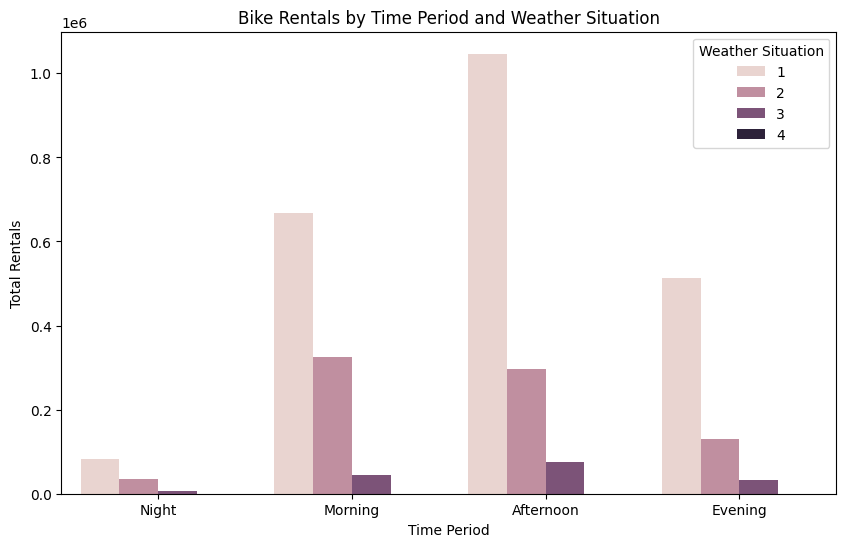

In [73]:
# Creating manual clusters based on rental patterns
# For example, we can define time periods and weather situations

# Define time periods (e.g., Morning, Afternoon, Evening, Night)
hour_df['Time Period'] = pd.cut(hour_df['hr'], bins=[0, 6, 12, 18, 24], labels=['Night', 'Morning', 'Afternoon', 'Evening'])

# Grouping by time period and weather situation
clustered_df = hour_df.groupby(['Time Period', 'weathersit']).agg({
    'cnt': 'sum',
}).reset_index()

# Plotting the clustered data
plt.figure(figsize=(10, 6))
sns.barplot(data=clustered_df, x='Time Period', y='cnt', hue='weathersit')
plt.title('Bike Rentals by Time Period and Weather Situation')
plt.xlabel('Time Period')
plt.ylabel('Total Rentals')
plt.legend(title='Weather Situation')
plt.show()


Insight:

- Manual clustering reveals patterns in bike rentals based on specific time periods and weather conditions, which can be valuable for operational decisions.


## Conclusion

- Secara keseluruhan, hasil analisis mengindikasikan bahwa faktor lingkungan dan temporal memainkan peran kunci dalam menentukan pola penyewaan sepeda harian. Memahami faktor-faktor ini dapat membantu pengelola sistem bike sharing dalam merencanakan operasi dan promosi mereka untuk meningkatkan penggunaan sepeda.


- Dengan pemahaman yang lebih baik tentang perbedaan pola penggunaan antara pengguna kasual dan terdaftar, pengelola sistem bike sharing dapat mengembangkan strategi pemasaran dan operasional yang lebih tepat sasaran. Strategi ini dapat mencakup penawaran khusus untuk menarik pengguna kasual selama akhir pekan, serta program loyalitas untuk meningkatkan retensi pengguna terdaftar.


